# 예전 출시된 차량(Old)과 최근 출시된 차량(New) 비교 분석

In [167]:
import pandas as pd

## 분석용 통계 데이터 불러오기

In [168]:
df = pd.concat([pd.read_csv("./sk_section_statistics.csv"), pd.read_csv("./betterwhy_section_statistics.csv")])
df['car_type'] = df['car_type'].replace('G80E', 'G80')
df

,car_id,car_type,charge_type,start_time,end_time,soh,p_volt,p_current,cell_volt_diff,soc_start,...,mileage,accum_mileage,km_per_kWh,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180,model_year,model_month
0,M1200607445,IONIQ5,discharge,2022-01-22 07:40:46.000,2022-01-22 08:08:17.000,100.0,688.742771,10.078313,0.015060,71.0,...,25.0,4691.0,3.676471,23.0,23.0,52.0,35.0,28.0,NaN,NaN
1,M1200607199,NIRO,discharge,2022-06-18 15:43:28,2022-06-18 17:06:51,100.0,351.014170,29.982186,0.003279,45.0,...,100.0,31725.0,6.134969,34.0,68.0,40.0,44.0,304.0,NaN,NaN
2,M2210704031,EV6,discharge,2022-06-14 19:53:17,2022-06-15 00:08:35,100.0,775.018750,3.877361,0.009167,96.0,...,117.0,50250.0,5.763547,291.0,122.0,153.0,120.0,19.0,NaN,NaN
3,M1200607322,IONIQ5,discharge,2022-06-13 14:43:17,2022-06-13 17:23:30,100.0,724.475220,7.252203,0.007291,93.5,...,108.0,12601.0,5.654450,99.0,243.0,256.0,236.0,45.0,NaN,NaN
4,M2210703646,EV6,discharge,2022-05-29 15:41:38,2022-05-29 17:10:04,100.0,752.867442,8.120155,0.007597,79.0,...,52.0,19712.0,5.909091,18.0,38.0,29.0,38.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36734,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-07 22:00:00:966,2024-08-08 04:02:03:256,100.0,744.765899,8.072201,0.006772,45.0,...,0.0,44448.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36735,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-01 22:00:45:911,2024-08-02 03:46:42:474,100.0,747.009458,8.059742,0.006840,45.5,...,0.0,44191.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36736,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-19 22:00:37:369,2024-08-20 05:49:33:909,100.0,734.813780,8.188490,0.006467,31.0,...,0.0,44965.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36737,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-09-01 22:00:28:312,2024-09-02 06:16:06:264,100.0,733.664765,8.088426,0.004632,27.5,...,0.0,46382.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0


## 이상치 구간 제거 (방전중인데 전류가 음수인 경우, 충전중인데 전류가 양수인 경우)

In [169]:
# p_current 값 조건에 따라 NaN으로 대체
# charge_type이 discharge인데 p_current가 양수인 경우 NaN으로 대체
df.loc[(df['charge_type'] == 'discharge') & (df['p_current'] < 0), 'p_current'] = float('nan')
# charge_type이 fast_charge 또는 slow_charge인데 p_current가 음수인 경우 NaN으로 대체
df.loc[(df['charge_type'].isin(['fast_charge', 'slow_charge'])) & (df['p_current'] > 0), 'p_current'] = float('nan')
df

,car_id,car_type,charge_type,start_time,end_time,soh,p_volt,p_current,cell_volt_diff,soc_start,...,mileage,accum_mileage,km_per_kWh,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180,model_year,model_month
0,M1200607445,IONIQ5,discharge,2022-01-22 07:40:46.000,2022-01-22 08:08:17.000,100.0,688.742771,10.078313,0.015060,71.0,...,25.0,4691.0,3.676471,23.0,23.0,52.0,35.0,28.0,NaN,NaN
1,M1200607199,NIRO,discharge,2022-06-18 15:43:28,2022-06-18 17:06:51,100.0,351.014170,29.982186,0.003279,45.0,...,100.0,31725.0,6.134969,34.0,68.0,40.0,44.0,304.0,NaN,NaN
2,M2210704031,EV6,discharge,2022-06-14 19:53:17,2022-06-15 00:08:35,100.0,775.018750,3.877361,0.009167,96.0,...,117.0,50250.0,5.763547,291.0,122.0,153.0,120.0,19.0,NaN,NaN
3,M1200607322,IONIQ5,discharge,2022-06-13 14:43:17,2022-06-13 17:23:30,100.0,724.475220,7.252203,0.007291,93.5,...,108.0,12601.0,5.654450,99.0,243.0,256.0,236.0,45.0,NaN,NaN
4,M2210703646,EV6,discharge,2022-05-29 15:41:38,2022-05-29 17:10:04,100.0,752.867442,8.120155,0.007597,79.0,...,52.0,19712.0,5.909091,18.0,38.0,29.0,38.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36734,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-07 22:00:00:966,2024-08-08 04:02:03:256,100.0,744.765899,NaN,0.006772,45.0,...,0.0,44448.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36735,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-01 22:00:45:911,2024-08-02 03:46:42:474,100.0,747.009458,NaN,0.006840,45.5,...,0.0,44191.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36736,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-08-19 22:00:37:369,2024-08-20 05:49:33:909,100.0,734.813780,NaN,0.006467,31.0,...,0.0,44965.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0
36737,V013AK0001,IONIQ6_LONGRANGE,slow_charge,2024-09-01 22:00:28:312,2024-09-02 06:16:06:264,100.0,733.664765,NaN,0.004632,27.5,...,0.0,46382.0,0.000000,NaN,NaN,NaN,NaN,NaN,2022.0,1.0


In [170]:
# 차량id, 차종, 급속/완속/방전 타입, 구간 시작시간, 구간 끝 시간, soh 평균, 팩 전압 평균, 팩 전류 평균, 
# 셀 최대/최소 전압차 평균, soc 시작 값, soc 끝 값, soc 충/방전 량, 구간 기간(초), 1시간당 SOC 충방전 속도,
# 소모/충전 전력 량, 1시간당 소모/충전된 전력량, SOC 1%당 소모/충전된 전력 량, 모듈 1~4 평균 온도 평균,
# 기온 평균, 구간 주행거리, 누적 주행거리, 전비, 연식(년), 연식(월)

# car_id, car_type, charge_type, start_time, end_time, soh, p_volt , p_current, \
# cell_volt_diff, soc_start, soc_end, soc_quan, period, charge_discharge_speed, \
# power_quan, power_per_hour, power_per_soc, module_temp, \
# temperature, mileage, accum_mileage, km_per_kWh, model_year, model_month

## 예전에 출시한 차 (2020 이전)
#### "IONIQ", "NIRO", "KONA", "KONA_LONGRANGE", "NIRO_LONGRANGE", "SOUL_LONGRANGE"

## 비교적 최근에 나온차 (2020 이후)
#### "EV6", "EV6_LONGRANGE", "IONIQ5", "IONIQ5_LONGRANGE", "GV60", "G80"

In [171]:
# 그룹 정의
old_vehicles = ["IONIQ", "NIRO", "KONA", "KONA_LONGRANGE", "NIRO_LONGRANGE", "SOUL_LONGRANGE"]
new_vehicles = ["EV6", "EV6_LONGRANGE", "IONIQ5", "IONIQ5_LONGRANGE", "GV60", "G80" ]
#new_vehicles = ["GV70", "NIRO2", "NIRO_NEW", "NIRO_PLUS", "IONIQ6_LONGRANGE", "EV9"]

In [172]:
# 그룹별 데이터 분리
df['vehicle_group'] = df['car_type'].apply(
    lambda x: 'Old' if x in old_vehicles else 'New' if x in new_vehicles else 'Unknown'
)

# 배터리 크기 데이터 추가
battery_sizes = {
    "BONGO3": 58, "KONA": 64, "NIRO": 64, "PORTER2": 58, "SOUL_LONGRANGE": 64,
    "EV6": 58, "EV6_LONGRANGE": 77.4, "IONIQ": 38.3, "IONIQ5": 58, "KONA_LONGRANGE": 64,
    "NIRO_LONGRANGE": 64, "EV9": 99.8, "G80": 87.2, "GV60": 77.4, "GV70": 77.4,
    "IONIQ5_LONGRANGE": 77.4, "IONIQ6_LONGRANGE": 77.4, "NIRO2": 64, "NIRO_NEW": 64,
    "NIRO_PLUS": 64
}

# 배터리 크기 열 추가
df['battery_size'] = df['car_type'].map(battery_sizes)

In [173]:
# 배터리 크기 범위 지정
def classify_battery(size):
    if size <= 50:
        return "Small"
    elif 50 < size <= 70:
        return "Medium"
    elif size > 70:
        return "Large"
    else:
        return "Unknown"

df['battery_category'] = df['battery_size'].apply(classify_battery)

## Old, New 그룹의 차종별, 충방전 구간별 통계

In [174]:
def calculate_statistics(group):   
    # soc 50% 이상 혹은 이하일때 충전 및 방전 속도
    charge_discharge_speed_over_50 = group[group['soc_start'] >= 50]['charge_discharge_speed'].mean()
    charge_discharge_speed_under_50 = group[group['soc_end'] <= 50]['charge_discharge_speed'].mean()
    return pd.Series({
        'vehicle_group': group['vehicle_group'].iloc[0],
        'battery_category': group['battery_category'].iloc[0],
        'car_type': group['car_type'].iloc[0],
        'charge_type': group['charge_type'].iloc[0],
        'p_volt': group['p_volt'].mean(),
        'p_current': group['p_current'].mean(),
        'cell_volt_diff': group['cell_volt_diff'].mean(),
        'module_temp': group['module_temp'].mean(),
        'km_per_kWh': group['km_per_kWh'].mean(),
        'charge_discharge_speed': group['charge_discharge_speed'].mean(),
        'charge_discharge_speed_over_50' : charge_discharge_speed_over_50,# soc 50% 이상 일때 충전 및 방전 속도
        'charge_discharge_speed_under_50' : charge_discharge_speed_under_50,# soc 50% 이하일때 충전 및 방전 속도
        'power_per_hour': group['power_per_hour'].mean(),
        'power_per_soc': group['power_per_soc'].mean(),
        'speed_0': group['speed_0'].mean(),
        'speed_0_30': group['speed_0_30'].sum(),
        'speed_30_60': group['speed_30_60'].sum(),
        'speed_60_90': group['speed_60_90'].sum(),
        'speed_90_180': group['speed_90_180'].sum()
    })
    
# 그룹별 통계 계산
grouped_stats = df.groupby(['charge_type', 'car_type']).apply(calculate_statistics).reset_index(drop=True)
grouped_stats = grouped_stats[grouped_stats['vehicle_group'] != 'Unknown']
grouped_stats

,vehicle_group,battery_category,car_type,charge_type,p_volt,p_current,cell_volt_diff,module_temp,km_per_kWh,charge_discharge_speed,charge_discharge_speed_over_50,charge_discharge_speed_under_50,power_per_hour,power_per_soc,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180
1,New,Medium,EV6,discharge,733.044680,10.521262,0.007023,18.834529,4.695450,9.302914,9.143549,10.723839,10.079562,1.139680,71.042288,2897366.0,2565402.0,2902156.0,2034252.0
2,New,Large,EV6_LONGRANGE,discharge,746.748291,NaN,0.007644,26.309569,3.019426,5.115378,4.910201,6.960777,8.827351,1.832338,NaN,0.0,0.0,0.0,0.0
4,New,Large,G80,discharge,564.388942,14.593338,0.007356,19.696959,3.973790,8.604905,8.467511,10.128319,11.438204,1.390862,155.169052,1297881.0,887870.0,881642.0,634347.0
5,New,Large,GV60,discharge,735.191253,16.294619,0.006744,26.902832,4.401998,13.668299,13.585784,14.733672,14.693385,1.127051,87.573077,12661.0,13956.0,17928.0,22267.0
7,Old,Small,IONIQ,discharge,367.069274,NaN,0.011560,30.567474,1.781058,10.285029,10.075562,12.314300,12.531268,1.249376,NaN,0.0,0.0,0.0,0.0
8,New,Medium,IONIQ5,discharge,669.385733,10.251287,0.007722,18.242921,4.398214,8.918269,8.827974,10.448192,9.141261,1.076249,158.322327,7003174.0,6494627.0,5463760.0,3288790.0
9,New,Large,IONIQ5_LONGRANGE,discharge,717.498391,NaN,0.007691,26.487250,2.857734,4.259029,4.180856,5.586048,7.378055,1.802981,NaN,0.0,0.0,0.0,0.0
11,Old,Medium,KONA,discharge,376.614896,11.930005,0.006286,19.648241,4.601383,6.716472,6.653807,7.246636,6.896111,1.063356,1246.742038,5201068.0,6973274.0,3298439.0,368687.0
12,Old,Medium,KONA_LONGRANGE,discharge,377.628728,NaN,0.006657,24.665935,1.809675,5.051048,4.767222,7.806577,13.134120,2.728169,NaN,0.0,0.0,0.0,0.0
13,Old,Medium,NIRO,discharge,374.485584,15.527412,0.006368,18.446508,4.679449,7.725179,7.582988,9.012362,7.201943,0.976580,468.915414,13002988.0,13934513.0,9567285.0,4714146.0


## 주요 지표 시각화

## 방전구간만 추출

In [175]:
discharge_stats = grouped_stats[grouped_stats['charge_type'] == 'discharge']
discharge_stats = discharge_stats[discharge_stats['car_type'] != 'BONGO3']
discharge_stats = discharge_stats[discharge_stats['car_type'] != 'PORTER2']
discharge_stats

,vehicle_group,battery_category,car_type,charge_type,p_volt,p_current,cell_volt_diff,module_temp,km_per_kWh,charge_discharge_speed,charge_discharge_speed_over_50,charge_discharge_speed_under_50,power_per_hour,power_per_soc,speed_0,speed_0_30,speed_30_60,speed_60_90,speed_90_180
1,New,Medium,EV6,discharge,733.044680,10.521262,0.007023,18.834529,4.695450,9.302914,9.143549,10.723839,10.079562,1.139680,71.042288,2897366.0,2565402.0,2902156.0,2034252.0
2,New,Large,EV6_LONGRANGE,discharge,746.748291,NaN,0.007644,26.309569,3.019426,5.115378,4.910201,6.960777,8.827351,1.832338,NaN,0.0,0.0,0.0,0.0
4,New,Large,G80,discharge,564.388942,14.593338,0.007356,19.696959,3.973790,8.604905,8.467511,10.128319,11.438204,1.390862,155.169052,1297881.0,887870.0,881642.0,634347.0
5,New,Large,GV60,discharge,735.191253,16.294619,0.006744,26.902832,4.401998,13.668299,13.585784,14.733672,14.693385,1.127051,87.573077,12661.0,13956.0,17928.0,22267.0
7,Old,Small,IONIQ,discharge,367.069274,NaN,0.011560,30.567474,1.781058,10.285029,10.075562,12.314300,12.531268,1.249376,NaN,0.0,0.0,0.0,0.0
8,New,Medium,IONIQ5,discharge,669.385733,10.251287,0.007722,18.242921,4.398214,8.918269,8.827974,10.448192,9.141261,1.076249,158.322327,7003174.0,6494627.0,5463760.0,3288790.0
9,New,Large,IONIQ5_LONGRANGE,discharge,717.498391,NaN,0.007691,26.487250,2.857734,4.259029,4.180856,5.586048,7.378055,1.802981,NaN,0.0,0.0,0.0,0.0
11,Old,Medium,KONA,discharge,376.614896,11.930005,0.006286,19.648241,4.601383,6.716472,6.653807,7.246636,6.896111,1.063356,1246.742038,5201068.0,6973274.0,3298439.0,368687.0
12,Old,Medium,KONA_LONGRANGE,discharge,377.628728,NaN,0.006657,24.665935,1.809675,5.051048,4.767222,7.806577,13.134120,2.728169,NaN,0.0,0.0,0.0,0.0
13,Old,Medium,NIRO,discharge,374.485584,15.527412,0.006368,18.446508,4.679449,7.725179,7.582988,9.012362,7.201943,0.976580,468.915414,13002988.0,13934513.0,9567285.0,4714146.0


In [176]:
# 시각화 코드 추가
import matplotlib.pyplot as plt

In [177]:
# 시각화에 사용할 지표
metrics = ['p_volt', 'p_current', 'cell_volt_diff', 'module_temp', 'km_per_kWh', 'charge_discharge_speed', 
           'power_per_hour', 'power_per_soc' ]


# Old, Mid, New 순서로 정렬하여 데이터 준비
grouped_data_numeric = discharge_stats.groupby('vehicle_group')[metrics].mean().reindex(["Old", "New"]).reset_index()
grouped_data_numeric

,vehicle_group,p_volt,p_current,cell_volt_diff,module_temp,km_per_kWh,charge_discharge_speed,power_per_hour,power_per_soc
0,Old,373.058273,13.728709,0.007434,25.384309,2.687037,7.880148,14.118068,1.886773
1,New,694.376215,12.915126,0.007363,22.745677,3.891102,8.311466,10.259636,1.394860


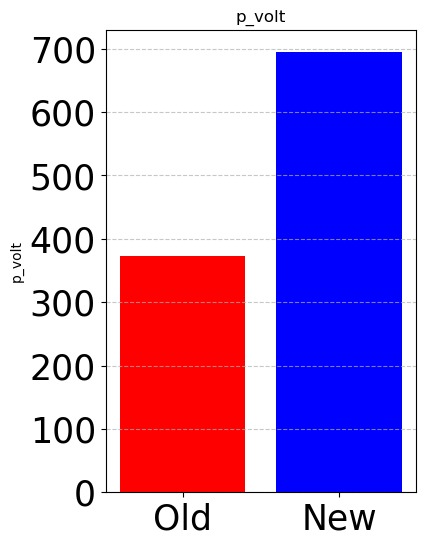

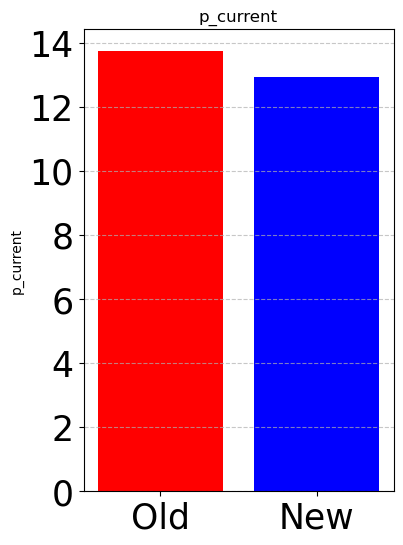

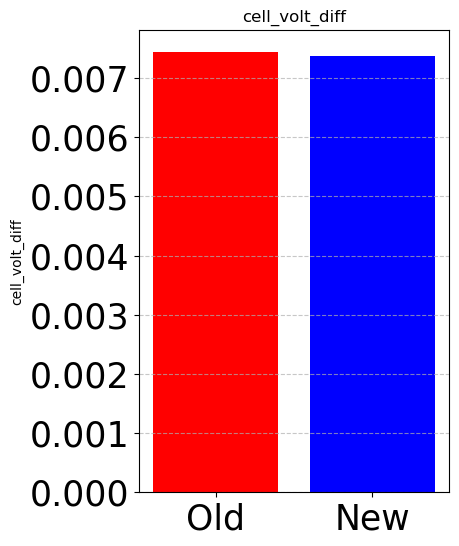

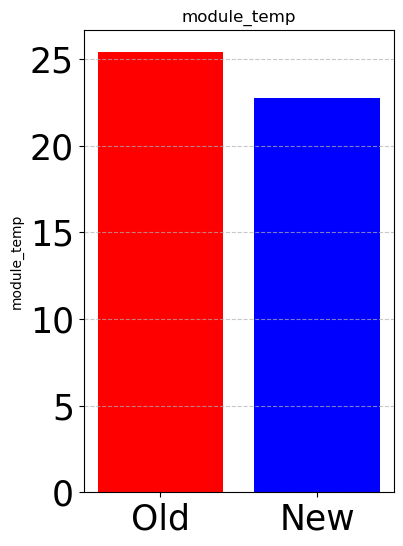

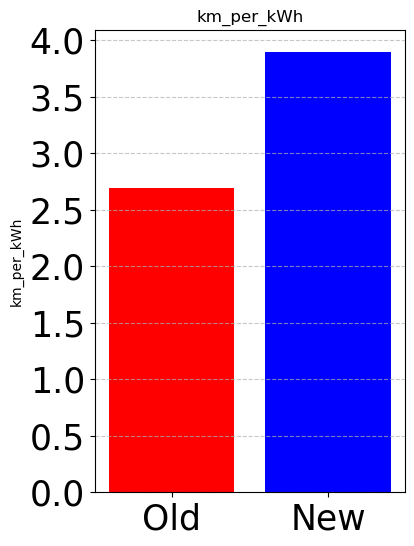

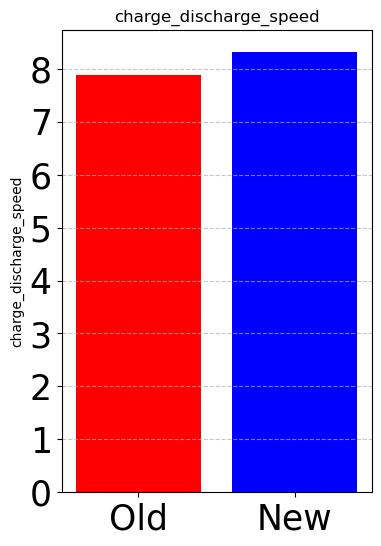

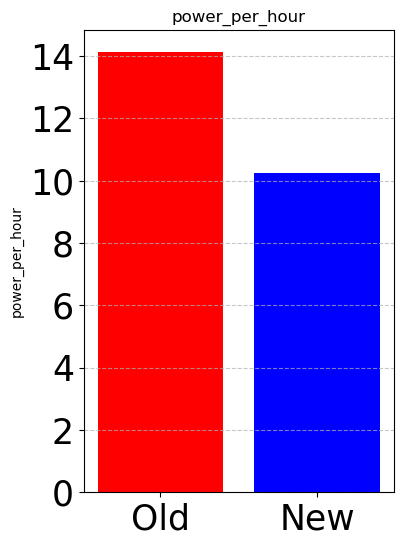

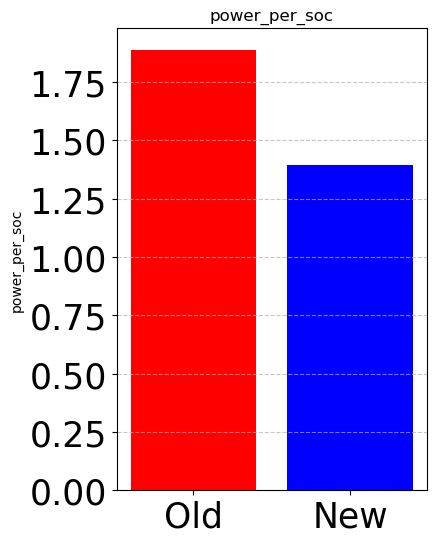

In [178]:
# 각 지표에 대해 시각화
for metric in metrics:
    plt.figure(figsize=(4,6))
    plt.bar(grouped_data_numeric['vehicle_group'], grouped_data_numeric[metric], color=['red', 'blue', 'green'])
    plt.title(f'{metric}')
    plt.ylabel(metric)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## 급속충전구간 추출

In [186]:
discharge_stats = grouped_stats[grouped_stats['charge_type'] == 'fast_charge']
discharge_stats = discharge_stats[discharge_stats['car_type'] != 'BONGO3']
discharge_stats = discharge_stats[discharge_stats['car_type'] != 'PORTER2']
discharge_stats

# 시각화에 사용할 지표
metrics = ['charge_discharge_speed', 'charge_discharge_speed_over_50', 'charge_discharge_speed_under_50' ]


# Old, Mid, New 순서로 정렬하여 데이터 준비
grouped_data_numeric = discharge_stats.groupby('vehicle_group')[metrics].mean().reindex(["Old", "New"]).reset_index()
grouped_data_numeric

,vehicle_group,charge_discharge_speed,charge_discharge_speed_over_50,charge_discharge_speed_under_50
0,Old,43.908797,32.299827,66.497438
1,New,68.905115,59.157268,68.700656


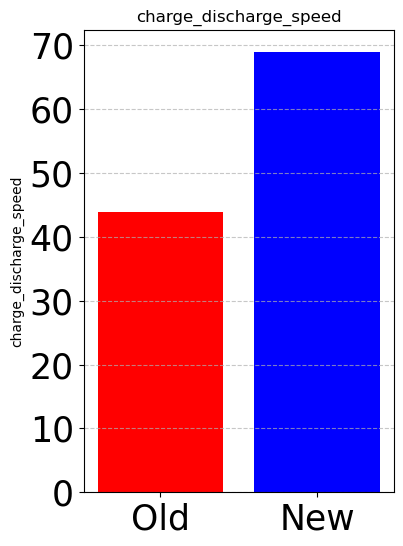

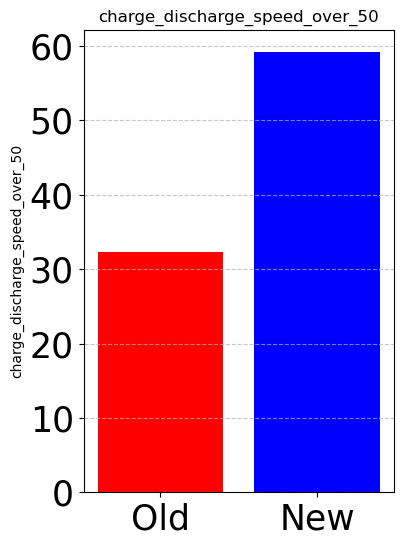

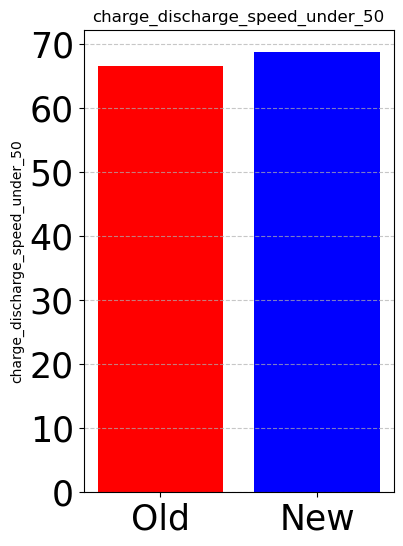

In [187]:
# 각 지표에 대해 시각화
for metric in metrics:
    plt.figure(figsize=(4,6))
    plt.bar(grouped_data_numeric['vehicle_group'], grouped_data_numeric[metric], color=['red', 'blue', 'green'])
    plt.title(f'{metric}')
    plt.ylabel(metric)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## 완속충전구간 추출

In [188]:
discharge_stats = grouped_stats[grouped_stats['charge_type'] == 'slow_charge']
discharge_stats = discharge_stats[discharge_stats['car_type'] != 'BONGO3']
discharge_stats = discharge_stats[discharge_stats['car_type'] != 'PORTER2']
discharge_stats

# 시각화에 사용할 지표
metrics = ['charge_discharge_speed', 'charge_discharge_speed_over_50', 'charge_discharge_speed_under_50' ]


# Old, Mid, New 순서로 정렬하여 데이터 준비
grouped_data_numeric = discharge_stats.groupby('vehicle_group')[metrics].mean().reindex(["Old", "New"]).reset_index()
grouped_data_numeric

,vehicle_group,charge_discharge_speed,charge_discharge_speed_over_50,charge_discharge_speed_under_50
0,Old,6.988795,6.607807,6.863662
1,New,6.250239,6.060752,6.310846


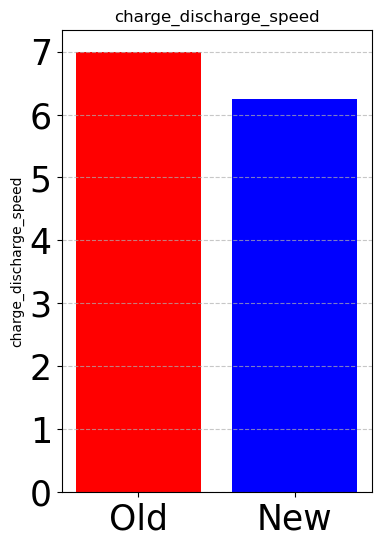

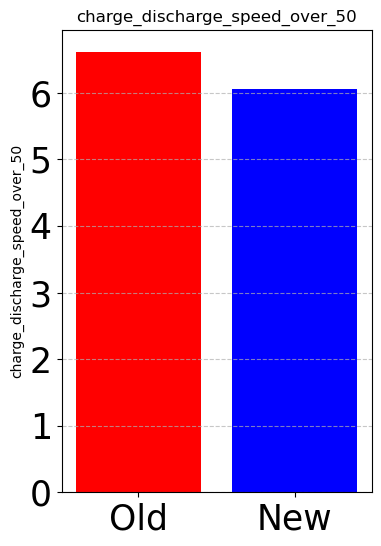

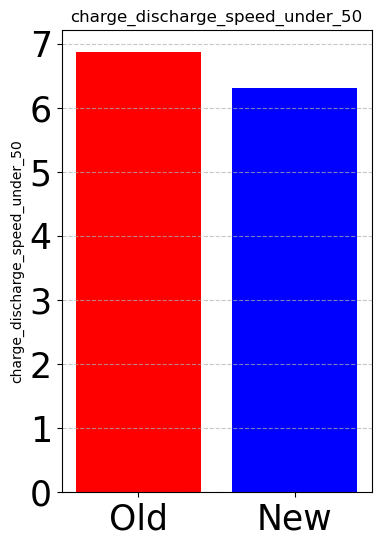

In [189]:
# 각 지표에 대해 시각화
for metric in metrics:
    plt.figure(figsize=(4,6))
    plt.bar(grouped_data_numeric['vehicle_group'], grouped_data_numeric[metric], color=['red', 'blue', 'green'])
    plt.title(f'{metric}')
    plt.ylabel(metric)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

## 레이더 차트를 통한 주요 지표 비교

In [183]:
import numpy as np


def normalize(df, columns):
    normalized_df = df.copy()
    for col in columns:
        max_value = df[col].max()
        min_value = df[col].min()
        if max_value == min_value:
            normalized_df[col] = 3.95  # 동일 값일 경우 중간값으로 설정
        else:
            # 스케일링: 최소값 = 4, 최대값 = 4.9
            normalized_df[col] = 4 + (df[col] - min_value) * (0.9 / (max_value - min_value))
    return normalized_df

metrics2 = ['km_per_kWh','p_volt','p_current','module_temp','cell_volt_diff','charge_discharge_speed']
grouped_data_normalized = normalize(result, metrics2)
grouped_data_normalized['vehicle_group'] = ['old', 'new']

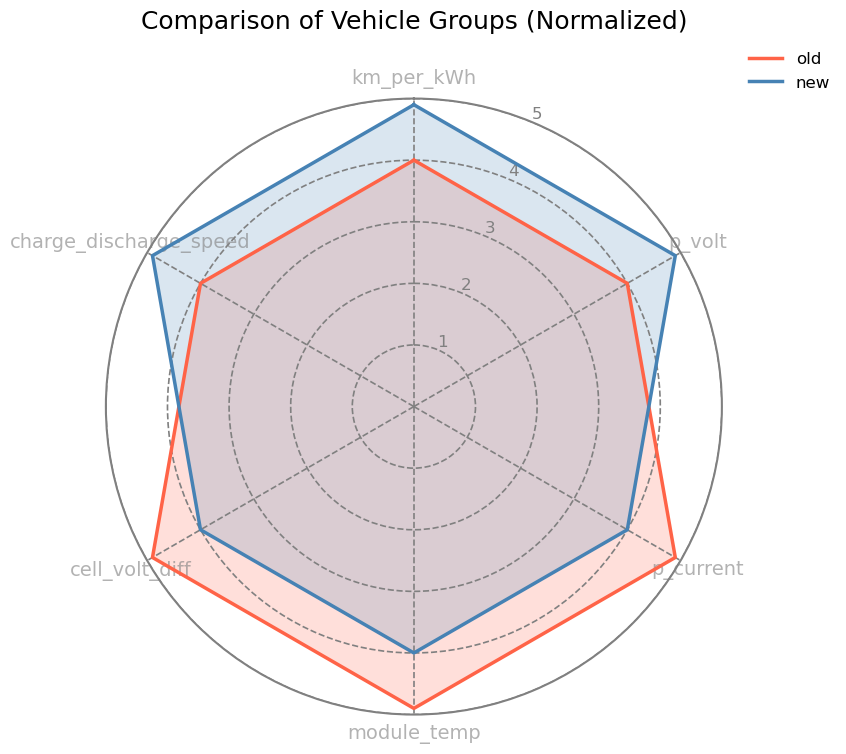

In [184]:
# 레이더 차트 생성 함수
def create_radar_chart(df, categories, title):
    labels = categories
    num_vars = len(labels)

    # 각 그룹 데이터 설정
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # 마지막 점을 첫 번째 점과 연결하여 레이더 차트 완성

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # 그룹별 색상 지정
    colors = ['#FF6347', '#4682B4', '#32CD32']  # 부드러운 색상 지정

    for idx, row in df.iterrows():
        values = row[categories].tolist()
        values += values[:1]
        ax.plot(angles, values, label=row['vehicle_group'], linewidth=2.5, linestyle='solid', color=colors[idx])
        ax.fill(angles, values, alpha=0.2, color=colors[idx])

    # 레이더 차트 설정
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_thetagrids(np.degrees(angles[:-1]), labels, fontsize=14, color='gray', alpha=0.6)

    # 격자선 스타일 개선 (안쪽 선 진하게 설정)
    ax.spines['polar'].set_color('gray')
    ax.spines['polar'].set_linewidth(1.5)  # 안쪽 선 두께 설정
    ax.grid(color='gray', linestyle='--', linewidth=1.2)  # 안쪽 격자선 두께 설정

    # 축 값 범위와 라벨 설정
    ax.set_ylim(0, 5)  # 정규화된 값 범위 (0~5)
    ax.tick_params(axis='y', labelsize=12, colors='gray')  # 축 값 라벨도 연하게 설정

    # 범례 위치 조정
    plt.title(title, size=18, y=1.1)
    plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=12, frameon=False)

    plt.show()
# 레이더 차트 생성
create_radar_chart(grouped_data_normalized, metrics2, "Comparison of Vehicle Groups (Normalized)")
